<b> 
    <font size="7">
        Computational Finance and FinTech <br><br>
        M.Sc. International Finance
    </font>
</b>
<br><br>
<img src="_pics/HWR.png" width=400px>
<br><br>
<b>
    <font size="5"> 
        Prof. Dr. Natalie Packham <br>
        Berlin School of Economics and Law <br>
        Summer Term 2019 
    </font>
</b>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Financial-Time-Series" data-toc-modified-id="Financial-Time-Series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Financial Time Series</a></span><ul class="toc-item"><li><span><a href="#Financial-Data" data-toc-modified-id="Financial-Data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Financial Data</a></span></li><li><span><a href="#Correlation-analysis-and-linear-regression" data-toc-modified-id="Correlation-analysis-and-linear-regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Correlation analysis and linear regression</a></span></li><li><span><a href="#Time-series-models:-Empirical-stylised-facts" data-toc-modified-id="Time-series-models:-Empirical-stylised-facts-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Time series models: Empirical stylised facts</a></span></li><li><span><a href="#Time-Series-Models:-GARCH" data-toc-modified-id="Time-Series-Models:-GARCH-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Time Series Models: GARCH</a></span></li></ul></li></ul></div>

# Financial Time Series

* Further reading: __Py4Fi, Chapter 8__
* This session also covers material not in __PyFi__.
* Time series are ubiquitous in finance. 
* `pandas` is the main library in Python to deal with time series. 

## Financial Data

### Financial data

* For the time being we work with locally stored data files.
* These are in `.csv`-files (comma-separated values), where the data entries in each row are separated by commas. 
* Some initialisation:

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

### Data import
* `pandas` provides a numer of different functions and `DataFrame` methods for importing and exporting data.
* Here we use `pd.read_csv()`.
* The file that we load contains end-of-day data for different financial instruments retrieved from Thomson Reuters. 

In [3]:
filename = './data/tr_eikon_eod_data.csv' # path and filename
f = open(filename, 'r')  
f.readlines()[:5]  # show first five lines

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

### Data import

In [4]:
data = pd.read_csv(filename,  # import csv-data into DataFrame
                   index_col=0, # take first column as index
                   parse_dates=True)  # index values are datetime

In [13]:
data.info()  # information about the DataFrame object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


### Data import

In [9]:
data.head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


### Data import

In [10]:
data.tail()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


### Data import

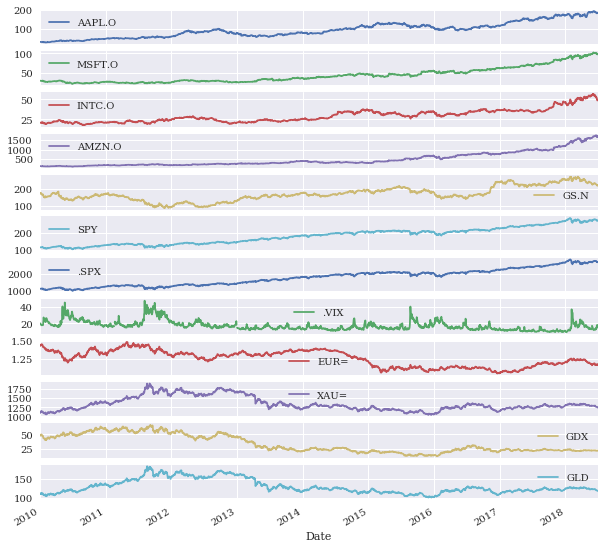

In [17]:
data.plot(figsize=(10, 10), subplots=True);  

### Data import

* The identifiers used by Thomson Reuters are so-called RIC's. 
* The financial instruments in the data set are:

In [18]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

### Data import

In [20]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


### Summary statistics

In [22]:
data.describe().round(2)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


### Summary statistics
* The `aggregate()`-function allows to customise the statistics viewed:

In [23]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


### Returns
* When working with financial data we typically (=always - you must have good reasons to deviate from this) work with performance data, i.e., __returns__. 
* Reasoning: 
     * Historical data are mainly used to make forecasts one or several time periods forward. 
     * The daily average stock price over the last eight years is meaningless to make a forecast for tomorrow's stock price. 
     * However, the daily returns are possible scenarios for the next time period(s). 
* The function `pct_change()` calculates discrete returns: 
$$r_t^{\rm d}=\frac{S_{t}-S_{t-1}}{S_{t-1}},$$
     where $S_t$ denotes the stock price at time $t$. 

### Returns

In [27]:
data.pct_change().round(3).head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


### Returns

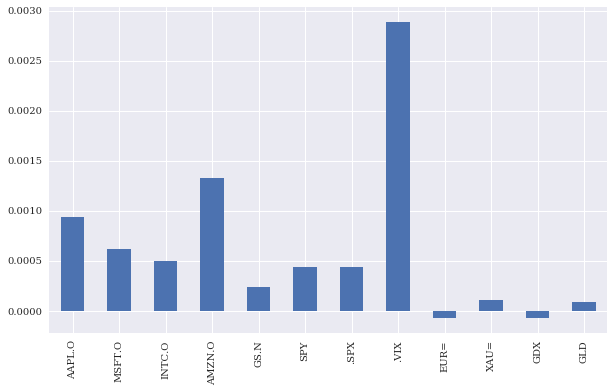

In [28]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  

### Returns
* In finance, __log-returns__, also called __continuous returns__, are often preferred over discrete returns: 
$$ r_t^{\rm c} = \ln\left(\frac{S_t}{S_{t-1}}\right).$$
* The main reason is that log-return are additive over time. 
* For example, the log-return from $t-1$ to $t+1$ is the sum of the single-period log-returns: 
$$ r_{t-1,t+1}^{\rm c} = \ln \left(\frac{S_{t+1}}{S_t}\right) + \ln \left(\frac{S_t}{S_{t-1}}\right) = \ln\left(\frac{S_{t+1}}{S_t}\cdot \frac{S_t}{S_{t-1}}\right) = \ln\left(\frac{S_{t+1}}{S_{t-1}}\right). $$
* Note: If the sampling (time) intervall is small (e.g. one day or one week), then the difference between discrete returns and log-returns is negligible. 

### Returns

In [29]:
rets = np.log(data / data.shift(1))  # calculates log-returns in a vectorised way

In [30]:
rets.head().round(3)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


### Returns

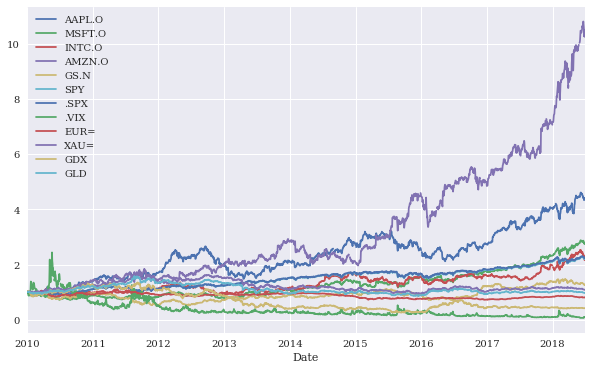

In [31]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));  # recover price paths from log-returns

### Resampling
* Down-sampling is achieved by `resample()`:

In [33]:
data.resample('1w', label='right').last().head()  # down-sample to weekly time intervals

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


## Correlation analysis and linear regression
* To further illustrate how to work with financial time series we consider the S&P 500 stock index and the VIX volatility index. 
* Empirical stylised fact: As the S&P 500 rises, the VIX falls, and vice versa. 
* Note: This is about __correlation__ not __causation__. 

### Correlation analysis

In [105]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('./data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


### Correlation analysis

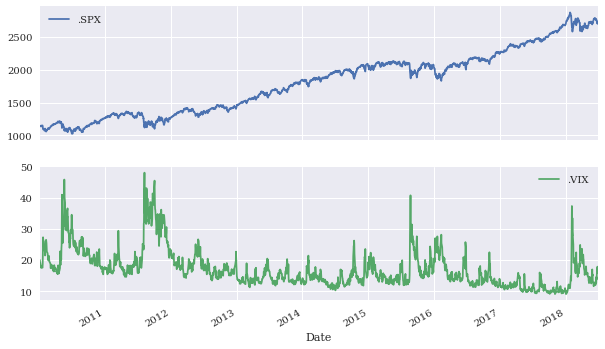

In [106]:
data.plot(subplots=True, figsize=(10, 6));

### Correlation analysis
* Transform both data series into log-returns:

In [107]:
rets = np.log(data / data.shift(1)) 
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [109]:
rets.dropna(inplace=True) # drop NaN (not-a-number) entries

### Correlation analysis

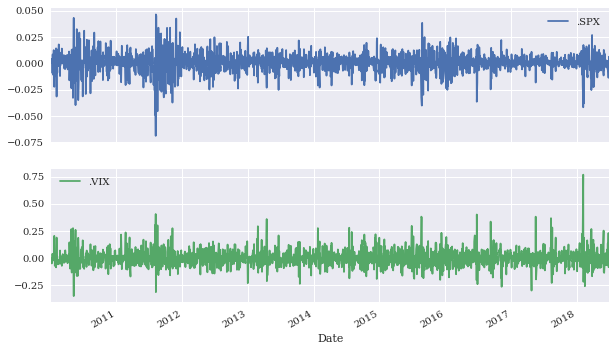

In [110]:
rets.plot(subplots=True, figsize=(10, 6));

### Correlation analysis

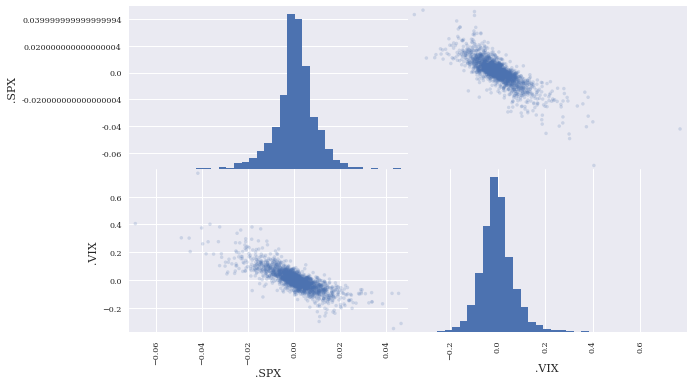

In [111]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));

### Correlation analysis

In [112]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


### OLS regression
* __Linear regression__ captures the linear relationship between two variables. 
* For two variables $x,y$, we postulate a linear relationship: 
$$ y = \alpha + \beta x + \varepsilon, \quad \alpha, \beta\in \mathbb{R}.$$
* Here, $\alpha$ is the __intercept__, $\beta$ is the __slope (coefficient)__ and $\varepsilon$ is the __error term__. 
* Given  data sample of joint observations $(x_1,y_1), \ldots, (x_n,y_n)$, we set 
$$ y_i = \hat\alpha + \hat\beta x_i + \hat\varepsilon_i,$$
where $\hat\alpha$ and $\hat\beta$ are estimates of $\alpha,\beta$ and $\hat\varepsilon_1,
\ldots, \hat\varepsilon_n$ are the so-called __residuals__. 
* The __ordinary least squares (OLS)__ estimator $\hat\alpha,\hat\beta$ corresponds to those values of $\alpha,\beta$ that minimise the sum of squared residuals: 
$$\min_{\alpha,\beta} \sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n (y_i-\alpha-\beta x_i)^2.$$

### OLS regressions
* Simplest form of OLS regression:

In [113]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  # fit a linear equation (a polynomial of degree 1)
reg.view() # the fitted paramters

array([-6.65160028e+00,  2.62132142e-03])

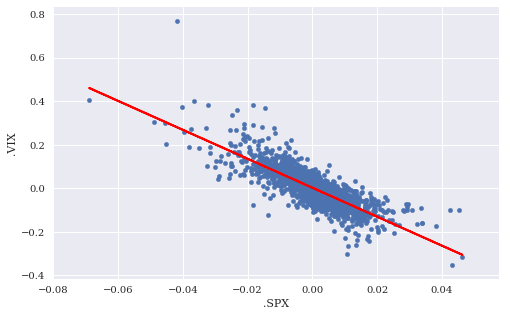

In [123]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(8, 5)) 
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);

In [122]:
ax.plot?

### OLS regression
* To do a more refined OLS regression with a proper analysis, use the package `statsmodels`. 

In [129]:
import statsmodels.api as sm

Y=rets['.VIX']
X=rets['.SPX']
X = sm.add_constant(X)

In [130]:
model = sm.OLS(Y,X)
results = model.fit()

In [131]:
results.params

const    0.002621
.SPX    -6.651600
dtype: float64

In [132]:
results.predict()[0:10]

array([-0.01807052, -0.0010063 , -0.0239404 , -0.01651898, -0.00898726,
        0.06531557, -0.05252965, -0.01349928,  0.07500527, -0.08000615])

### OLS regression

In [133]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   .VIX   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3914.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:59:45   Log-Likelihood:                 3550.1
No. Observations:                2137   AIC:                            -7096.
Df Residuals:                    2135   BIC:                            -7085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.001      2.633      0.0

## Time series models: Empirical stylised facts
* We discuss empirical stylised facts of financial time series. 
* The GARCH model is the standard workhorse in financial time series analysis.

### Time series models
* Load data set containing of daily DAX closing prices (1990-2019):

In [134]:
dax = pd.read_csv('./_src/yahoo_GDAXI.csv',index_col = 0)
dax.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,1788.890015,1788.890015,1788.890015,1788.890015,1788.890015,0.0
1990-01-03,1867.290039,1867.290039,1867.290039,1867.290039,1867.290039,0.0
1990-01-04,1830.920044,1830.920044,1830.920044,1830.920044,1830.920044,0.0
1990-01-05,1812.900024,1812.900024,1812.900024,1812.900024,1812.900024,0.0
1990-01-08,1841.469971,1841.469971,1841.469971,1841.469971,1841.469971,0.0


### Time series models
* Transform closing prices to log returns:

In [135]:
data=dax['Close']
returns = 100*np.log(data / data.shift(1))
returns.dropna(inplace=True)
returns.head()

Date
1990-01-03    4.289288
1990-01-04   -1.966961
1990-01-05   -0.989081
1990-01-08    1.563636
1990-01-09    1.297570
Name: Close, dtype: float64

### Time series models

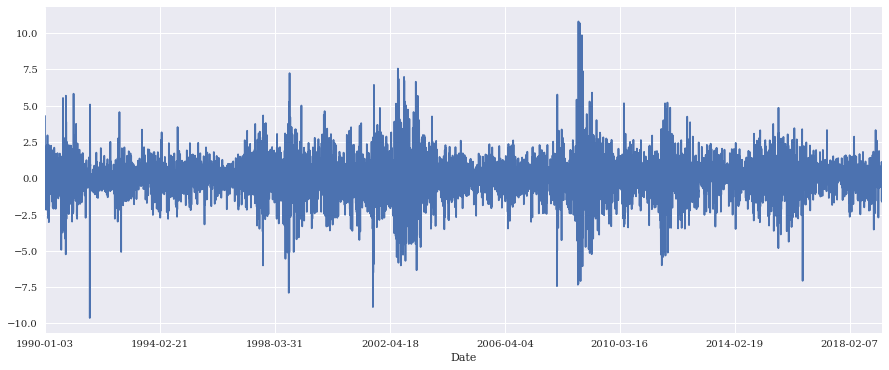

In [139]:
returns.plot(figsize=(15,6));

### Time series models
*  When working with a data sample, we often assumes that the data are independent and identically distributed ("iid"). 
* The previous plot shows that the "iid" assumption is violated.
* The "iid" assumption is in general not justified for financial data, and more sophisticated models for time series are more appropriate for capturing phenomena such as volatility clustering.

### Time series models
* An __empirical stylised fact__ of a financial time series is an empirical observations that applies to the majority of (daily) series of asset returns, such as log-returns of equities, indexes, FX rates and commodity prices (see Mcneil, 2005, and Cont, 2001).
* Generally accepted stylised facts of asset returns are: 
     1. Return series are not iid although they show little serial correlation.
     2. Series of absolute or squared returns show profound serial correlation.
     3. Conditional expected returns are close to zero.
     4. Volatility appears to vary over time.
     5. Return series are leptokurtic or heavy-tailed.
     6. Extreme returns appear in clusters.
<font size="2">  
  A.J. McNeil, R. Frey, and P. Embrechts. Quantitative Risk
  Management. Princeton University Press, Princeton, NJ, 2005.
    <br>
  R. Cont. Empirical properties of asset returns: stylized
  facts and statistical issues. Quantitative Finance,
  1(2):223–236, 2001. 
</font>


### Time series models
* The figure below illustrates the first three stylised facts (serial correlation = autocorrelation):

In [140]:
ac = [];
acabs=[];
for i in range(0,30):
    ac.append(returns.autocorr(i))
    acabs.append(abs(returns).autocorr(i))

### Time series models
* The figure below illustrates the first three stylised facts (serial correlation = autocorrelation):

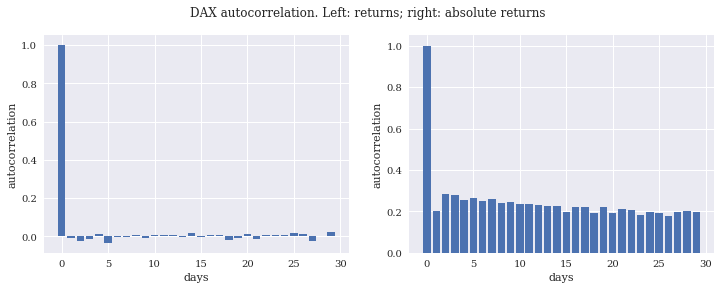

In [141]:
fig = plt.figure(figsize=(12,4))
fig.suptitle("DAX autocorrelation. Left: returns; right: absolute returns")
plt.subplot(121)
plt.bar(range(0,30), ac);
plt.xlabel('days');
plt.ylabel('autocorrelation');
plt.subplot(122)
plt.bar(range(0,30), acabs);
plt.xlabel('days');
plt.ylabel('autocorrelation');

### Time series models
* The excess kurtosis of the DAX returns suggests that more extreme events occurs than a normal distribution would suggest. 

In [7]:
returns.kurtosis()

4.7289880389545775

### Time series models
* The following figures shows the DAX volatility based on a rolling time windows of 252 trading days (approx.\ one year). 
* This illustrates that volatility varies over time. 

In [8]:
vol=returns.rolling(window=252).std()
vol.dropna(inplace=True)

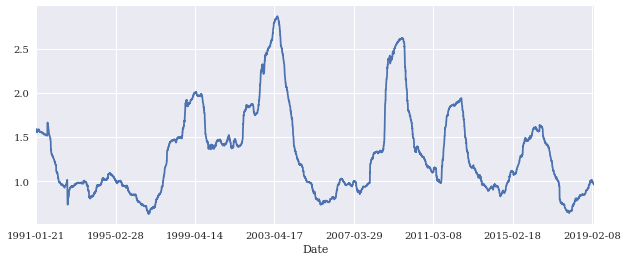

In [9]:
vol.plot(figsize=(10,4));

### Time series models
* The following figure illustrates the 100 most extreme DAX returns over the time period 1990-2019.
* These are not evenly spaced, but appear in clusters.

In [10]:
m = abs(returns).sort_values()[-100] # the top 100 returns are greater than this
m

4.49364555843897

In [11]:
mreturns = returns.loc[abs(returns) > m]

In [143]:
ret = pd.DataFrame(returns, index=returns.index)
mret = pd.DataFrame(mreturns, index=mreturns.index)
all = ret.join(mret, lsuffix='_caller', rsuffix='_other') # merge the data into one DataFrame

### Time series models

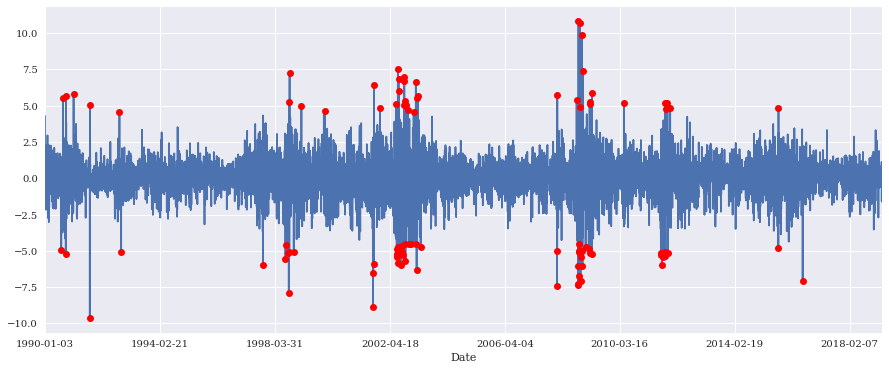

In [145]:
all.plot(figsize=(15,6), style=['', 'ro'], legend=None);

### Time series models
* These phenomena typically become less pronounced as the time period between successive returns is increased. 
* For daily or weekly data, however, it is clear that a model needs to capture the time series variations, most importantly the time-varying volatility. 


## Time Series Models: GARCH

### The GARCH model

* The class of {\bf GARCH (generalised autoregressive conditional heteroskedastic) models} incorporate time-varying volatility, autocorrelation in absolute / squared returns and fatter tails than suggested by the normal distribution (see Bollerlslev, 1986).
* The GARCH(1,1) is the simplest and most widely used of the family of GARCH-type models.
* A process $X=(X_t)_{t\in \mathbb{Z}}$ is a __GARCH(1,1) process__ if it is satisfies
  $$
  \begin{array}{rcl}
  X_t &=& \sigma_t Z_t\\
  \sigma_t^2 &=& \alpha_0 + \alpha_1 X_{t-1}^2 + \beta \sigma_{t-1}^2,
  \end{array}
  $$
  where the {\bf innovations} $Z_t$, $t=1, 2, \ldots$ are iid standard normally distributed, and $\alpha_0>0$, $\alpha_1\geq 0$ and $\beta\geq 0$. 
* In this model periods of high volatility tend to be __persistent__, that is, if either $|X_{t-1}|$ or $\sigma_{t-1}$ are large, then $|X_t|$ has a tendency to be large as well, which in turn causes a high volatility. 

<font size="2">
    Bollerslev, T. (1986). Generalized autoregressive conditional heteroskedasticity. Journal of Econometrics, pp. 31 (3), 307--327.
</font>


### Properties of the GARCH model

__Proposition__

Let $X$ be a a GARCH(1,1) process satisfying $\alpha_1+\beta<1$. Then, for all $s,t\in\mathbb{Z}$,
1. $\mathbb{E}(X_t)=0$;
2. $\text{Var}(X_t)=\displaystyle\frac{\alpha_0}{1-\alpha_1-\beta}$;
3. the {\bf autocorrelation} $\mathbb E(X_t\, X_s)/\sqrt{\text{Var}(X_t)\, \text{Var}(X_s)}$ is $0$ whenever $s\not=t$;
4. the variance of $X_t$ conditional on the information up to time $t-1$ is $\sigma_t^2$;
5. the kurtosis of $X_t$ is
    $$
    \frac{\mathbb E(X_t^4)}{\mathbb E(X_t^2)^2} = \frac{3\, (1-(\alpha_1+\beta)^2)}{1-(\alpha_1+\beta)^2
        -       2\, \alpha_1^2}, 
    $$
    In particular, $X_t$ has a positive excess kurtosis.

### Variants of the GARCH process
* The more general GARCH($p,q$) model is defined by setting the variance to
$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^p \alpha_i X_{t-i}^2 + \sum_{j=1}^q \beta_j
  \sigma_{t-j}^2. 
$$
* There are many extensions of GARCH processes (Integrated GARCH, GARCH with leverage, Threshold GARCH, ...). 


### Fitting a GARCH model

* Given a time series, such as the DAX returns, and postulatinga GARCH model, we find the parameters that provide the "best" fit for the data. 
* The best fit is generally obtained via the method of __maximum likelihood__.
* The `arch` library in Python will do this for us. 

### Fitting a GARCH model

In [146]:
from arch import arch_model
ret_demeaned=returns-returns.mean(); # de-mean process, i.e., adjust so that mean is zero
am = arch_model(ret_demeaned, mean = 'Zero')
res = am.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11626.026847183497
Iteration:      2,   Func. Count:     13,   Neg. LLF: 11625.965550453562
Iteration:      3,   Func. Count:     19,   Neg. LLF: 11623.43241756365
Iteration:      4,   Func. Count:     25,   Neg. LLF: 11622.72549915859
Iteration:      5,   Func. Count:     31,   Neg. LLF: 11622.613321349227
Iteration:      6,   Func. Count:     37,   Neg. LLF: 11622.038129157363
Iteration:      7,   Func. Count:     42,   Neg. LLF: 11621.980562427689
Iteration:      8,   Func. Count:     47,   Neg. LLF: 11621.978840084295
Iteration:      9,   Func. Count:     52,   Neg. LLF: 11621.978820104492
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11621.97881942417
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


### Fitting a GARCH model

In [147]:
res

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11622.0
Distribution:                  Normal   AIC:                           23250.0
Method:            Maximum Likelihood   BIC:                           23270.6
                                        No. Observations:                 7282
Date:                Mon, Mar 25 2019   Df Residuals:                     7279
Time:                        23:02:14   Df Model:                            3
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0283  8.755e-03      3.228  1.248e-03 [1.

### Fitting a GARCH model
* The following parameters are obtained: $\alpha_0=0.0283$, $\alpha_1=0.0823$ and $\beta=0.9019$. 
* All estimates are statistically significant ($p$-values<0.01). 

In [148]:
ret = pd.DataFrame(returns, index=returns.index)
vol = pd.DataFrame(res.conditional_volatility, index=vol.index)
all = ret.join(vol, lsuffix='_caller', rsuffix='_other') # merge the data into one DataFrame

### Fitting a GARCH model
* The plot shows the DAX returns together with the fitted GARCH volatility. 
* The initial volatility is typically chosen as the time series' unconditional volatility.

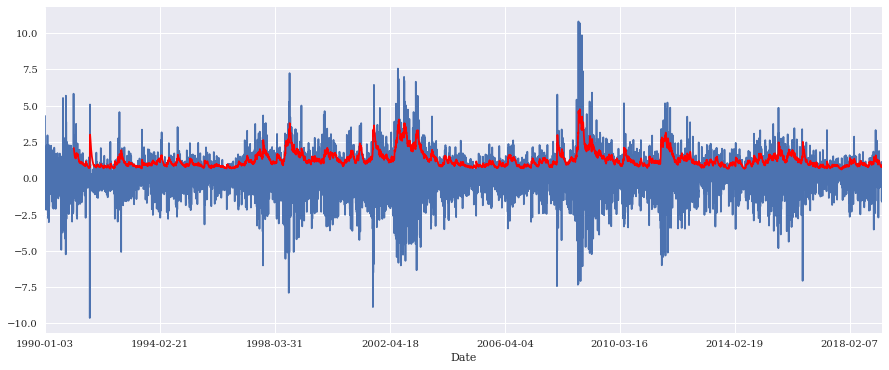

In [149]:
all.plot(figsize=(15,6), style=['', 'r'],legend=None);

### Validating a GARCH model

* To check the quality of the fit, one can compare the "residuals" $Z_t=X_t/\sigma_t$ with a standard normal
    distribution via a QQ-plot, see figure below. 

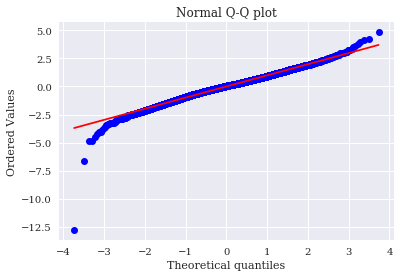

In [153]:
import scipy.stats as stats
residuals=res.resid/res.conditional_volatility; # the residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Validating a GARCH model
* This is what the residuals look like: 

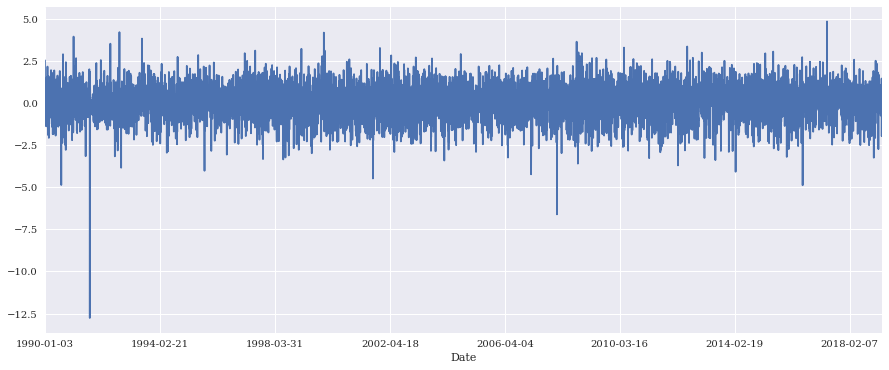

In [151]:
residuals.plot(figsize=(15,6));

### Validating a GARCH model

* In case the residuals do not fit the normal distribution, one may - in a second step - fit the residuals to a more appropriate distribution, such as the more heavy-tailed Student $t$. 

### Volatility forecasting
* One use of GARCH models is to forecast future volatility. 
* Given asset returns $x_0, \ldots, x_t$ assume that a GARCH model has been fitted and that the condition     $\alpha_1+\beta<1$ (see Proposition above) is fulfilled. 
* A prediction of $\sigma_{t+1}^2$ is given by
$$
\hat\sigma_{t+1}^2 = \mathbb E(X_{t+1}^2|X_t, \sigma_t) = \alpha_0 +
  \alpha_1 X_t^2 + \beta\sigma_t^2,  
$$
and, more generally for one time period $h$ periods forward,
$$
\hat\sigma_{t+h}^2=\mathbb E(X_{t+h}^2|X_t, \sigma_t) = \alpha_0\,
  \sum_{i=0}^{h-1} (\alpha_1+\beta)^i + 
  (\alpha_1+\beta)^{h-1}\, (\alpha_1 X_t^2 + \beta\sigma_t^2). 
$$
* A derivation of this formula is beyond the scope of the course. 


### Volatility forecasting

In [158]:
res.params

omega       0.028257
alpha[1]    0.082337
beta[1]     0.901897
Name: params, dtype: float64

In [160]:
sigmasq_f=[]
tmp=[]
alpha0=res.params[0]
alpha1=res.params[1]
beta=res.params[2]

for i in range(0,251):
    tmp.append((alpha1 + beta)**i)
    
for h in range(1,251):
     sigmasq_f.append(alpha0 * np.sum(tmp[0:h]) + tmp[h-1] * (alpha1 * returns[-1]**2 \
                                                              + beta * res.conditional_volatility[-1]**2))
    

### Volatility forecasting
* The figure below shows the volatility forecast for the DAX return data.
* The red line shows the unconditional standard deviation $\displaystyle
\sqrt{\frac{\alpha_0}{1-\alpha_1-\beta}}
$.

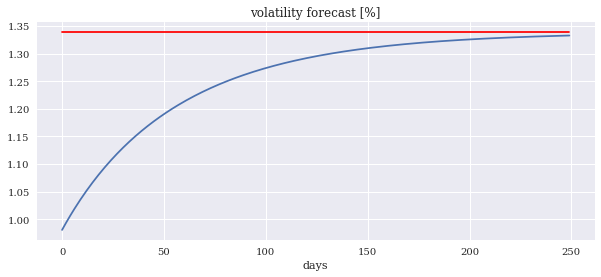

In [161]:
unconditional_vol=np.sqrt(res.params[0]/(1-res.params[1]-res.params[2]))*np.ones(len(sigmasq_f))
plt.figure(figsize=(10, 4))
plt.plot(np.sqrt(sigmasq_f))
plt.plot(unconditional_vol, 'r')
plt.title('volatility forecast [%]')
plt.xlabel('days');